<a href="https://colab.research.google.com/github/umi-na/machine_learning/blob/main/deep_learning_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 딥러닝 기초

데이터가 모델에 들어감
(우리가 설계하는 대부분은 모델)

모델로부터 예측 Prediction/Logit

예측을 평가(틀렸는지) Loss/Cost

평가를 최적화(왜 틀렸는지) Optimization
(앞에서 얻은 Loss값을 최소화하기 위해 최적화된 valiable값들로 반환)

다시 모델로 들어감

반복

결과

## Learning rate

최적화를 위해 cost를 줄일 때

cost를 줄이기 위한 정도(속도)라고 보면 됨earning rate

너무 작으면 작은 계곡에서도 제일 낮은 cost라고 착각할 수 있고

너무 빠르면 값이 이리저리 튄다

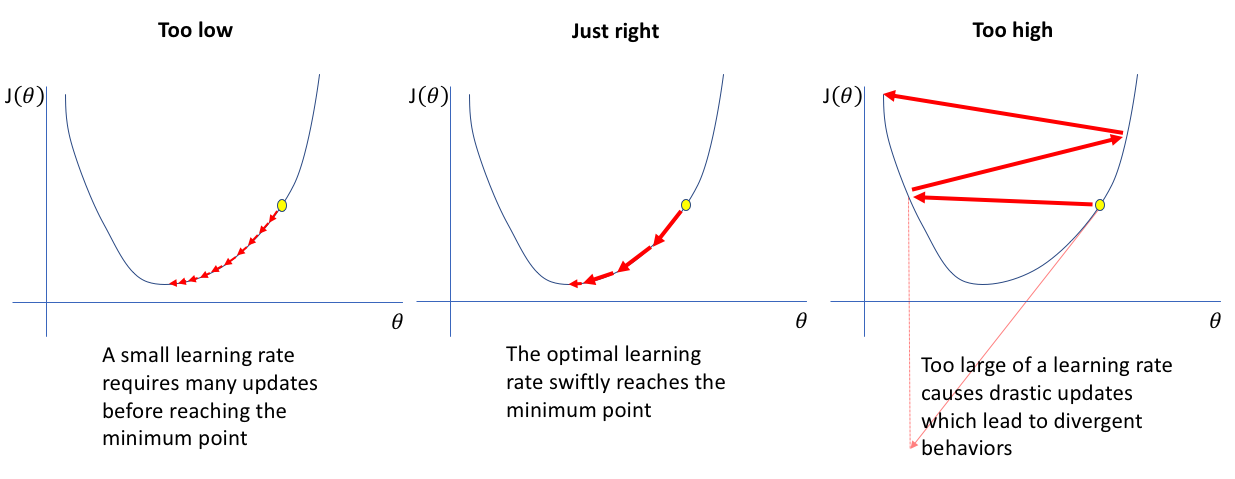

모든 Dataset에는 정답(Label)이 있어야 됨

CNN: 
convolutional(합성곱) neural network

## Tensorflow 설치하기

In [ ]:
import tensorflow as tf #tensorflow 설치, 런타임 유형 TPU(혹은 GPU) 사용 권장

In [ ]:
tf.__version__ #tensorflow 버전 확인

'2.4.1'

## Anaconda Basic

Shift+Enter: 실행 후 다음셀로 넘어감
<br>Alt+Enter: 실행 후 다음셀 생성
<br>Ctrl+Enter: 실행 후 자리에 그대로
<br>Shift+M: 셀 묶임
<br>Shift+Ctrl+ -: 커서 기준으로 셀 분리


실행 중인 셀을 모두 초기화 하고 싶을 때: restart
<br>모두 실행하고 싶을 때: run all

## Numpy

다차원 배열(like Tensor)을 생성할 수 있는 모듈

In [ ]:
import numpy as np

In [ ]:
arr = np.array(5) # array: 배열

In [ ]:
arr.shape #모양

()

In [ ]:
arr.ndim #차원의 개수

0

In [ ]:
arr = np.array([5])

In [ ]:
arr.shape #1차원에 1개

(1,)

In [ ]:
arr = np.array([[1, 2, 3]]) #3개 짜리가 2차원에 1개
arr.shape

(1, 3)

In [ ]:
arr = np.array([[1, 2, 3],[1, 2, 3],[1, 2, 3]]) #3개 짜리가 2차원에 3개
arr.shape

(3, 3)

In [ ]:
arr = np.array([[[[1,2,3],[1,2,3],[1,2,3]],[[1,2,3],[1,2,3],[1,2,3]]],[[[1,2,3],[1,2,3],[1,2,3]],[[1,2,3],[1,2,3],[1,2,3]]]])
arr.shape #4차원이라 숫자가 4개, 뒤에서부터 3개짜리가 3개 있는 

(2, 2, 3, 3)

In [ ]:
arr = np.arange(27).reshape(3,3,3)
arr

array([[[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8]],

       [[ 9, 10, 11],
        [12, 13, 14],
        [15, 16, 17]],

       [[18, 19, 20],
        [21, 22, 23],
        [24, 25, 26]]])

In [ ]:
np.max(arr, 2) #3번째 axis 값 중 최댓 값

array([[ 2,  5,  8],
       [11, 14, 17],
       [20, 23, 26]])

In [ ]:
np.max(arr, -1) #뒤에서 1번째(앞에서 3번째) axis

array([[ 2,  5,  8],
       [11, 14, 17],
       [20, 23, 26]])

# Graph Visualization: MatPlotLib
matplotlib를 사용하여 그래프와 이미지 시각화 가능

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
#주피터 내부에 그림을 띄우겠다는 명령어

## Basic Attributes

alpha: 투명도
<br>kind: 그래프 종류 'line', 'bar', 'barh', 'kde'
<br>logy: Y축에 대해 Log scaling
<br>use_index: 객체의 색인을 눈금 이름으로 사용할지 여부
<br>rot: 눈금 이름 돌리기 (rotating) 0~300
<br>xticks, yticks: x, y 축으로 사용할 값
<br>xlim, ylim: x, y축의 한계
<br>grid: 축의 그리드를 표현할지 여부

<br>subplots: 각 column에 독립된 subplot 그리기
<br>sharex, sharey: subplots=True 이면 같은 x,y축을 공유하고 눈금과 한계를 연결
<br>figsize: 생성될 그래프의 크기를 tuple로 지정
<br>title: 그래프의 제목 지정
<br>legend: subplot의 범례 지정
<br>sort_columns: column을 알파벳 순서로 그린다.

In [ ]:
data = np.random.randn(50).cumsum()
data

array([-0.6379073 ,  1.91255032,  2.34785567,  1.57844587,  1.7123149 ,
        2.32357005,  3.52457535,  2.05065596,  2.91203869,  1.62039151,
        3.27451709,  5.59615204,  5.95262618,  5.55794175,  4.71881068,
        4.43695017,  4.52950224,  4.23743747,  3.87409686,  2.79117924,
        1.05922324, -1.52355556,  0.69798302,  1.7052411 ,  1.91675253,
        1.87771838,  1.61084252,  2.86628899,  2.44158023,  3.52893521,
        3.66973483,  5.04817363,  7.32061686,  7.91039594,  7.83738329,
        8.43377182,  8.10162806,  6.95328325,  4.52687412,  3.59976203,
        3.36657621,  2.89707362,  1.50335409, -0.48592599, -2.25071302,
       -2.41687585, -3.49830732, -4.35973186, -7.70660344, -7.93159977])

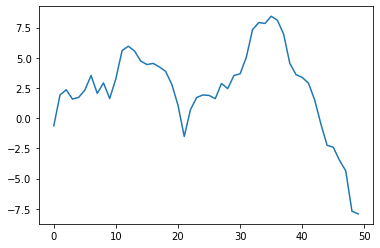

In [ ]:
plt.plot(data)
plt.show()

<function matplotlib.pyplot.show>

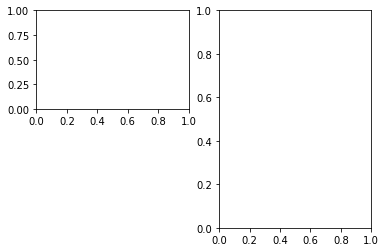

In [ ]:
# subplot 빈 그래프(그래프 기준을 정수로 잡고 싶을 때나 틀을 따로 잡고 싶을 때)
# plot 그래프

plt.subplot(2, 2, 1) #1행 2열 1번째(matplot은 0이 아닌 1부터 시작함)
plt.subplot(1, 2, 2) #1행 2열 2번째
plt.show

In [ ]:
hist_data = np.random.randn(100)
scat_data = np.arange(30)

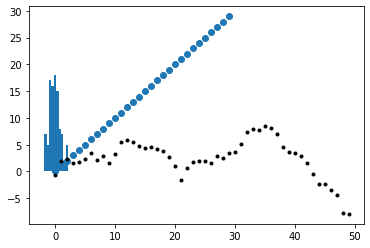

In [ ]:
plt.hist(hist_data)
plt.scatter(scat_data, np.arange(30))
plt.plot(data, 'k.')

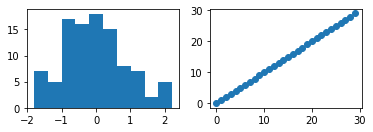

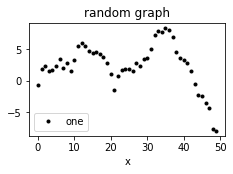

In [ ]:
plt.subplot(2,2,1) # subplot(221로 써도 됨)
plt.hist(hist_data)
plt.subplot(222)
plt.scatter(scat_data, np.arange(30))

plt.subplots(constrained_layout=True) # 그래프간 간격 최적으로 해줌

plt.subplot(223)
plt.title('random graph')
plt.xlabel('x')
plt.plot(data, 'k.', label = 'one')
plt.legend() # one이라는 label이 작게 표시되는 거

# Image Visualization: MatPlotLib

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/deep_learning/photo.jpg' 

image_pil = Image.open(path)
image = np.array(image_pil)

In [ ]:
image.shape

(406, 612, 3)

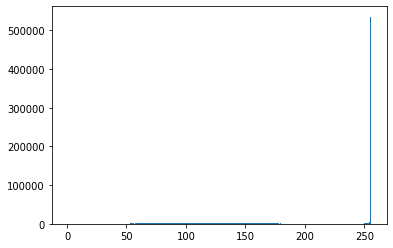

<function matplotlib.pyplot.show>

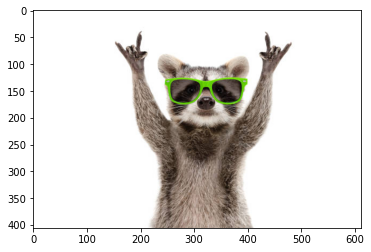

In [ ]:
plt.hist(image.ravel(), 256, [0, 256]) # 픽셀분포?
plt.show()

plt.imshow(image) # 그림 나타내기
plt.show

<function matplotlib.pyplot.show>

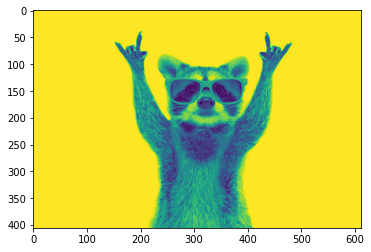

In [ ]:
image_pil = Image.open(path).convert("L")
image_bw = np.array(image_pil)
plt.imshow(image_bw)
plt.show

<function matplotlib.pyplot.show>

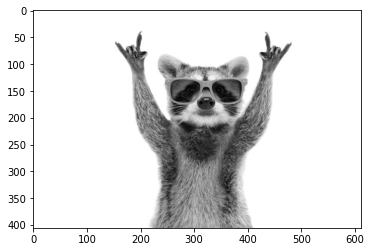

In [ ]:
plt.imshow(image_bw, 'gray')
plt.show

<function matplotlib.pyplot.show>

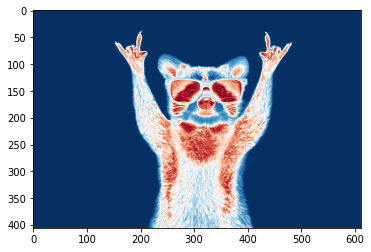

In [ ]:
plt.imshow(image_bw, 'RdBu')
plt.show

<function matplotlib.pyplot.show>

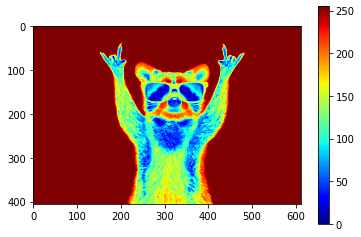

In [ ]:
plt.imshow(image_bw, 'jet')
plt.colorbar()
plt.show

In [ ]:
path2 = '/content/drive/MyDrive/Colab Notebooks/deep_learning/photo2.jpg'
dog = Image.open(path2)
image2 = np.array(dog)
image2.shape

(755, 500, 3)

In [ ]:
import cv2 # OpenCV

In [ ]:
image_re = cv2.resize(image2, (612, 406)) # 이미지 크기 바꾸기
image_re.shape

(406, 612, 3)

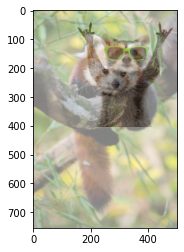

In [ ]:
plt.imshow(image)
plt.imshow(image2, alpha = 0.5) # 투명도
plt.show()

# Framework

TensorFlow
<br>TensorBoard, TFLite, TPU(colab)

PyTorch
<br>Dynamic Graph & Define by Run

# TensorFlow

In [ ]:
import numpy as np
import tensorflow as tf

TensorFlow에서는 Numpy가 Tensor로 변환되기도 하고 이미지를 Numpy로 변환하기도 해서 필수적으로 사용 됨

tf.constant: list, tuple, array모두 가능
<br>list: 한가지 이상의 데이터 타입이 올 수 있다(int, str, etc.). 데이터가 가변적이다.
<br>array: 한가지 데이터 타입만 올 수 있다. 데이터가 가변적이다.
<br>tuple: 한가지 이상의 데이터 타입이 올수 있다. 데이터가 불변이다.
<br> +따라서 Tuple은 딕셔너리의 key(해쉬)값이 될 수 있지만 List는 불가!

In [ ]:
arr = np.array([1, 2, 3])
tensor = tf.constant(arr)
tensor

<tf.Tensor: shape=(3,), dtype=int64, numpy=array([1, 2, 3])>

In [ ]:
tensor.shape

TensorShape([3])

## Data Type

주의: Tensor 생성 때도 data type을 우리가 정해주지 않기 때문에 data type에 대한 혼동이 올 수 있다
<br>python은 data type을 자동으로 정의해주기 때문에 혼동이 안 오려면 data type을 직접 정해주는 게 좋을 때도 있다
<br>! data type에 따라 모델의 무게나 성능 차이에도 영향을 줄 수 있다!

In [ ]:
tensor.dtype

tf.int64

In [ ]:
tensor = tf.constant([1,2,3], dtype=tf.float32)
tensor

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([1., 2., 3.], dtype=float32)>

Numpy에서 astyp()을 주었듯이, TensorFlow에서는 tf.cast사용

In [ ]:
arr=np.array([1,2,3], dtype=np.float32)

In [ ]:
arr.astype(np.uint8) #uint는 양수, int는 정수!

array([1, 2, 3], dtype=uint8)

In [ ]:
tensor

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([1., 2., 3.], dtype=float32)>

In [ ]:
tf.cast(tensor, dtype=tf.uint8)

<tf.Tensor: shape=(3,), dtype=uint8, numpy=array([1, 2, 3], dtype=uint8)>

Tensor에서 Numpy불러오기

In [ ]:
tensor.numpy()

array([1., 2., 3.], dtype=float32)

In [ ]:
np.array(tensor)

array([1., 2., 3.], dtype=float32)

In [ ]:
type(tensor)

tensorflow.python.framework.ops.EagerTensor

In [ ]:
type(tensor.numpy())

numpy.ndarray

## 난수 생성

numpy.random.randn(): normal distribution
<br>tf.random.normal: normal distribution
<br>tf.random.uniform: uniform distribution(정규분포)

In [ ]:
np.random.randn(9)

array([ 0.09651145, -0.49053147,  0.47998013,  1.49258226,  0.68413772,
        0.18308489,  1.12292279, -0.90462747,  1.25791129])

In [ ]:
tf.random.normal([3,3]) # [3,3]이 아닌 9를 넣으면 0~9사이의 랜덤한 값 1개만 나옴

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[ 0.15910022,  0.49423018, -0.33147585],
       [ 0.36444873,  0.93557227, -1.3352159 ],
       [ 2.5975318 , -0.42885762, -0.9399451 ]], dtype=float32)>

In [ ]:
tf.random.uniform([4,4])

<tf.Tensor: shape=(4, 4), dtype=float32, numpy=
array([[0.4898876 , 0.0404284 , 0.6096357 , 0.7891811 ],
       [0.9867604 , 0.36376536, 0.836185  , 0.5387269 ],
       [0.9698945 , 0.8853532 , 0.36584365, 0.02250993],
       [0.28079987, 0.07216227, 0.90881646, 0.74003386]], dtype=float32)>

## MNIST

data preprocess(데이터 전처리)

MNIST: 필기숫자 인식, TensorFlow에서 제공하는 데이터셋

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

%matplotlib inline

In [ ]:
from tensorflow.keras import datasets # keras: 파이썬으로 작성된 오픈소스 신경망 라이브러리

In [ ]:
mnist=datasets.mnist

In [ ]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
image = x_train[0] # 이미지화 할 수 있게 2차원 한 개만 불러옴
image.shape

(28, 28)

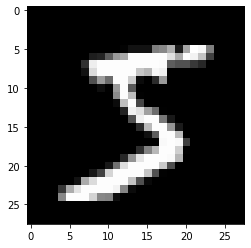

In [ ]:
plt.imshow(image, 'gray') # 28,28로 나오는건 gray scale이라서!

모델 사이즈, 채널 개수를 확인해 주는 것이 중요
<br>[batch_size, height, width, channel]형태여야 convolution에 들어갈 수 있음

In [ ]:
exp_data = np.expand_dims(x_train, 0)
exp_data.shape

(1, 60000, 28, 28)

In [ ]:
exp_data = np.expand_dims(np.expand_dims(x_train, 0), 0)
exp_data.shape

(1, 1, 60000, 28, 28)

In [ ]:
x_train = np.expand_dims(x_train, -1)
x_train.shape

(60000, 28, 28, 1)

In [ ]:
x_train = np.squeeze(x_train, -1)
x_train.shape

(60000, 28, 28)

tensorflow로 mnist datatset시각화

차원수 늘리기

In [ ]:
new_x_train = tf.expand_dims(x_train, -1) # tensorflow로 차원수 늘리기
new_x_train.shape

TensorShape([60000, 28, 28, 1])

In [ ]:
x_train[...,tf.newaxis].shape # tensorflow로 하는 다른 방법인데 이걸 제일 많이 사용할 것 같다!!!!!!!!!!!!

(60000, 28, 28, 1)

In [ ]:
reshape = x_train.reshape([60000, 28, 28, 1]) # 또 다른 방법
reshape.shape

(60000, 28, 28, 1)

In [ ]:
new_x_train = x_train[..., tf.newaxis]
new_x_train.shape

(60000, 28, 28, 1)

In [ ]:
disp = np.squeeze(new_x_train[0]) # 차원수 줄여주기, 3차원은 안 됨
disp.shape

(28, 28)

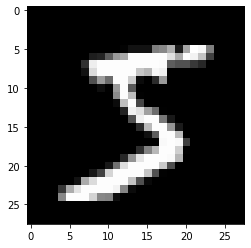

In [ ]:
plt.imshow(disp, 'gray')
plt.show()

## Label Dataset

In [ ]:
y_train.shape

(60000,)

In [ ]:
y_train[0] # 이미지 데이터셋의 정보가 5

5

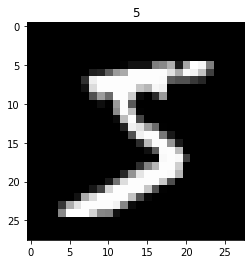

In [ ]:
plt.title(y_train[0])
plt.imshow(x_train[0], 'gray')
plt.show()

## OneHot Encoding

onehot encoding: 컴퓨터가 이해할 수 있는 형태로 변환해서 label을 주는 것

TensorFlow에 있는 keras에서 제공해줌
<br>keras: 파이썬으로 작성된 오픈소스 신경망 라이브러리

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
to_categorical(5,10) # 10개 중에 5번째로 알아서 labeling 해줌

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [ ]:
label = y_train[0]
label

5

In [ ]:
label_onehot = to_categorical(label, num_classes=10)
label_onehot

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


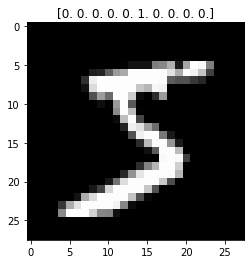

In [ ]:
plt.title(label_onehot)
plt.imshow(x_train[0], 'gray')
plt.show()

In [ ]:
image.shape # 언급했듯이 모델을 [batch_size, height, width, channel]형태로 만들어 줘야함

(28, 28)

In [ ]:
image = image[tf.newaxis, ..., tf.newaxis]
image.shape

(1, 28, 28, 1)

# CNN Modeling

Convolutional Neural Network
<br>convolutional: 나선의, **합성곱**

CNN Modeling은 크게 모드로 나눌 수 있음
<br>feature extraction: 특징을 뽑음, 예측단계는 아님
<br>classification: 예측

e.g. input - feature extracion - classification - output

## Feature Extraction
형상추출: 여러 layer에서 특징, 패턴별로 featur들을 뽑음

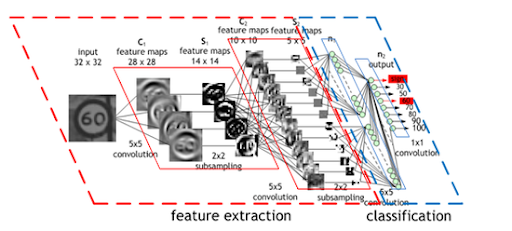

Feature Extraction의 layer
<br> e.g. convolution_1 - activation_function_1 -  convolution_2 - activation_function_2 - pooling

### Convolution

convolution layer
<br>Input image -> Filter bank(to be learned) -> Feature maps

filters: layer에서 나갈 때 몇 개의 filter를 만들 것인지(a.k.a weights, filters, channels)
<br>kermel_size: filter(weight)의 사이즈
<br>strides: 몇 개의 pixel을 skip하면서 훑어지나갈 것인지(사이즈에도 영향을 줌 e.g. 숫자가 클수록 이미지 사이즈는 줄어든다)
<br>padding: zero padding을 만들 것인지, VALID는 padding이 없고, SAME은 padding이 있음(사이즈에도 영향을 줌 e.g. valid의 경우 사이즈가 줄어듬)
<br>activation: activation function을 만들 것인지, 당장 설정 안해도 layer층을 따로 만들 수 있음(tangent, relu, etc.), 아무것도 설정 안해주면 none이 됨

In [ ]:
tf.keras.layers.Conv2D(filters=3, kernel_size=(3,3), strides=(1,1), padding='SAME', activation='relu')

# image에 있던 channel이 filter를 거쳐서 어떤 output이 나오는지 관찰하는 것

In [ ]:
layer = tf.keras.layers.Conv2D(3, 3, 1, 'SAME')
layer

In [ ]:
image = tf.cast(image, dtype=tf.float32)

In [ ]:
output = layer(image)
output

<tf.Tensor: shape=(1, 28, 28, 3), dtype=float32, numpy=
array([[[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        ...,

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]]], dtype

In [ ]:
import numpy as np
np.min(image), np.max(image)

(0.0, 255.0)

In [ ]:
np.min(output), np.max(output)

(-345.97766, 87.47146)

<function matplotlib.pyplot.show>

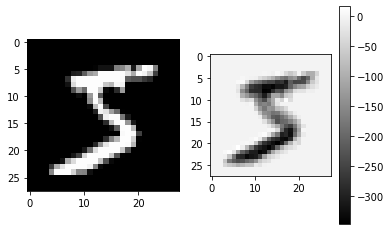

In [ ]:
plt.subplot(1,2,1)
plt.imshow(image[0, :, :, 0], 'gray')
plt.subplot(1,2,2)
plt.imshow(output[0, :, :, 0], 'gray')
plt.colorbar()
plt.show

In [ ]:
weight = layer.get_weights()

In [ ]:
weight[0].shape, weight[1].shape # weight의 모양, bias

((3, 3, 1, 3), (3,))

### Activation Function

np.min(output)의 경우 -값이 나올 수 있는데 이때 0미만의 값을 모두 없애줌

In [ ]:
act_layer = tf.keras.layers.ReLU()

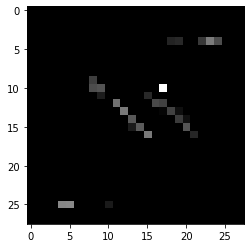

In [ ]:
act_output = act_layer(output)
plt.imshow(act_output[0, :, :, 0], 'gray')

### Pooling

일종의 압축, filter안에서 가장 큰 값만 가져옴

In [ ]:
pool_layer = tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2), padding='SAME')

In [ ]:
pool_output = pool_layer(act_output)
act_output.shape

TensorShape([1, 28, 28, 3])

In [ ]:
pool_output.shape # 압축된 크기

TensorShape([1, 14, 14, 3])

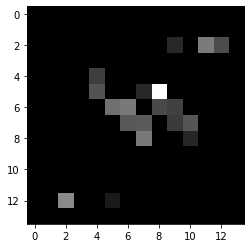

In [ ]:
plt.imshow(pool_output[0,:,:,0], 'gray')

## Classification

Classification layer

e.g. fullyconnected - flatten - dense - dropout

### Fully Connected

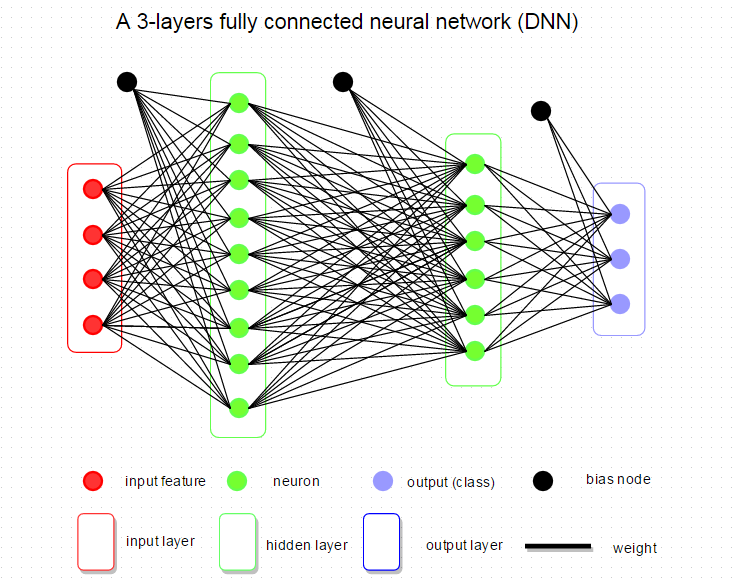

Y = wX + b

Y: neuron
w: weight
X: input
b: bias

### Flatten

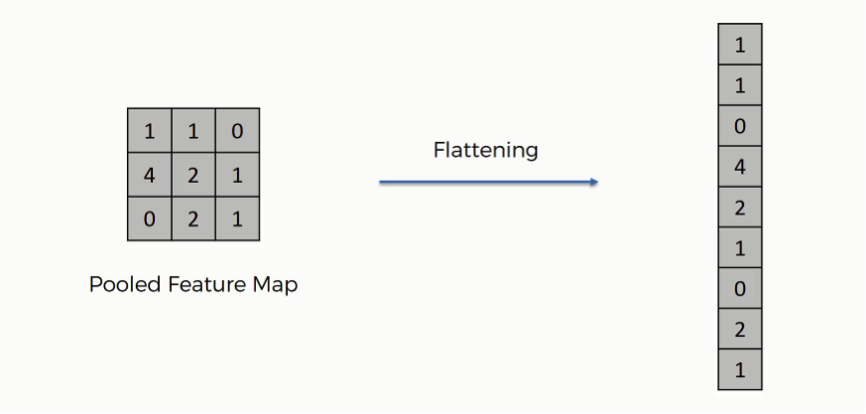

tf.keras.layers.Flatten()

In [ ]:
import tensorflow as tf

layer = tf.keras.layers.Flatten()
flatten = layer(output)

In [ ]:
output.shape

TensorShape([1, 28, 28, 3])

In [ ]:
flatten.shape #TensorShape(1, 2352)에서 1은 batchsize, 2352=28*28*3

TensorShape([1, 2352])

<function matplotlib.pyplot.show>

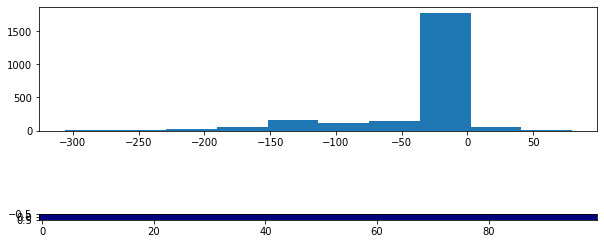

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(211)
plt.hist(flatten.numpy().ravel())
plt.subplot(212)
plt.imshow(flatten[:, :100], 'jet')
plt.show

### Dense

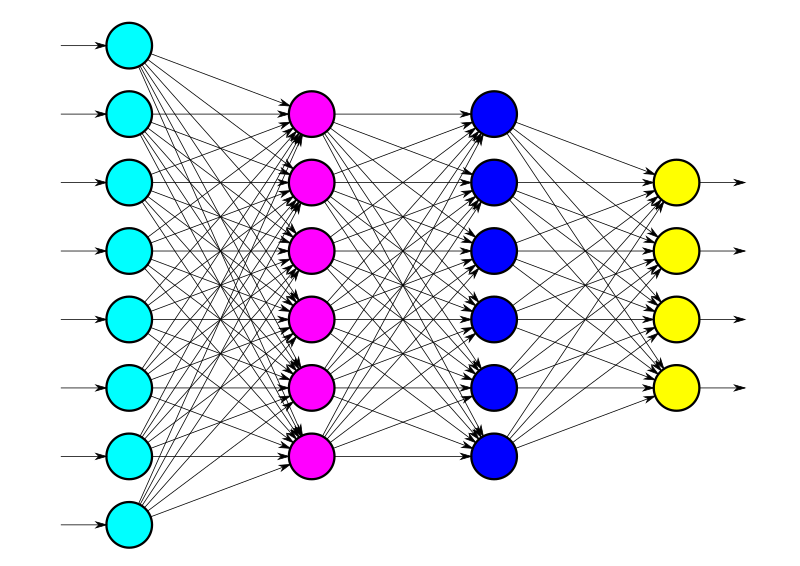

tf.keras.layers.Dense

모든 레이어의 요소를 하나씩 다 연결하겠다는 의미

In [ ]:
tf.keras.layers.Dense(32, activation='relu') # 위에서 하늘색이 flatten 된 요소라면 얘는 핑크노드 32개를 만들겠다는 의미

In [ ]:
layer = tf.keras.layers.Dense(32, activation='relu')
output = layer(flatten)

In [ ]:
output.shape

TensorShape([1, 32])

### DropOut

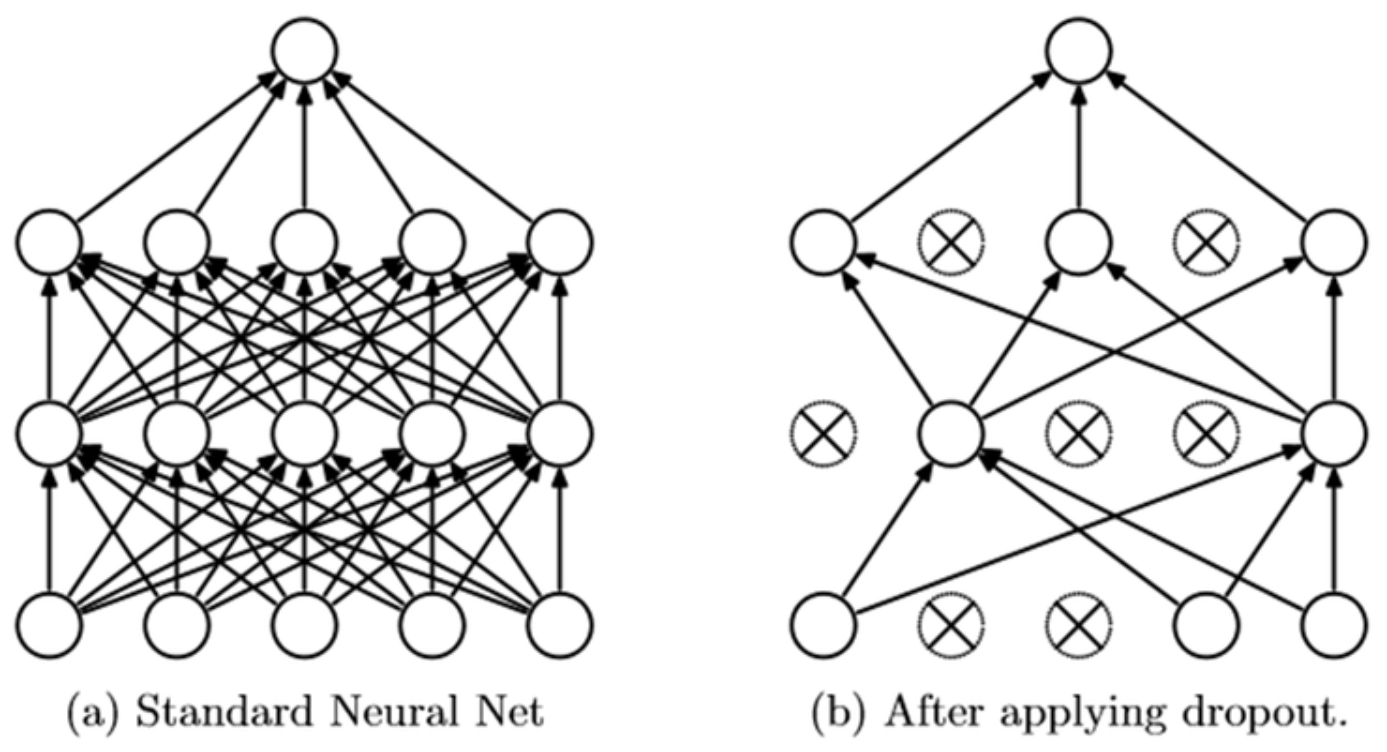

tf.keras.layers.Dropout

자동으로 노드를 끊어줌

학습모드일 때만 끊어주고, 학습이 종료되면 원래 형태로 돌아옴

In [ ]:
layer = tf.keras.layers.Dropout(0,7)
output = layer(output)

In [ ]:
output.shape # 학습이 종료되면 원래 형태로 돌아오기 때문에 노드 개수 동일

TensorShape([1, 32])

## 복습

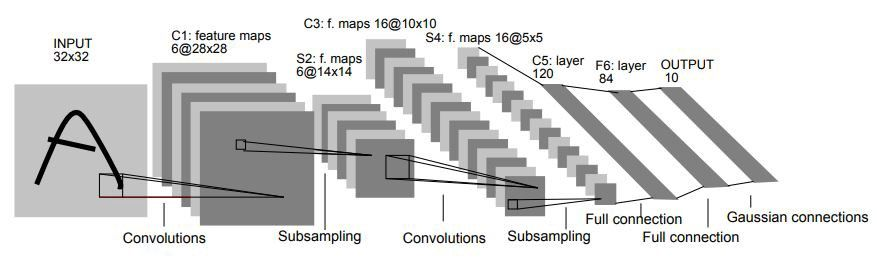

In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow.keras import layers
# tf.keras.layers를 반복하는 것도 번거로우니까 layers를 불러 옴

In [ ]:
input_shape = (28, 28, 1) # 먼저 모델을 설계할 땐 input으로 들어갈 shape를 지정하고
num_classes = 10 # 데이터를 사용할 class의 개수를 지정하고 시작

In [ ]:
inputs = layers.Input(shape = input_shape) #input입구를 만들었대

#Feature Extraction
# 여기서부터
net = layers.Conv2D(32, 3, padding='SAME')(inputs)
net = layers.Activation('relu')(net)
net = layers.Conv2D(32, 3, padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.MaxPool2D(2,2)(net)
net = layers.Dropout(0.25)(net)
# 여기까지가 convonlution block

net = layers.Conv2D(64, 3, padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.Conv2D(64, 3, padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.MaxPool2D(2,2)(net)
net = layers.Dropout(0.25)(net)

#Classification
net = layers.Flatten()(net)
net = layers.Dense(512)(net)
net = layers.Activation('relu')(net)
net = layers.Dropout(0,25)(net)
net = layers.Dense(10)(net) # MNIST를 사용하고 있는데 0~9까지 클래스가 10개이기 때문에 내보내는 마지막 노드도 10개가 되어야 됨
#그렇지 않으면 하나가 수치가 높게 받아서 컴퓨터는 그게 정답이라고 생가함
net = layers.Activation('softmax')(net)
# softmax = 마지막노드의 뒤죽박죽인 숫자의 합이 1이 되도록 하는 것
# e.g. '이건 개야 or 고양이야'가 아니라 개일 확률과 고양이일 확률로 나눠줌

model = tf.keras.Model(inputs=inputs, outputs=net, name='Basic_CNN')

In [ ]:
model.summary() # None으로 뜨는 건 batch size를 지정 안 했기 때문!

Model: "Basic_CNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
activation_18 (Activation)   (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
activation_19 (Activation)   (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 14, 14, 32)        0 